# Training & Testing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from tqdm import tqdm
from joblib import dump, load
from sklearn.metrics import f1_score
from sklearn.feature_extraction import DictVectorizer

In [3]:
data1 = pd.read_csv('Data/Clean_data_1.csv')

In [4]:
data2 = pd.read_csv('Data/Clean_data_2.csv')

In [6]:
data1

,0,1,2,3,4,5,6,7,8,9,...,Pediatrics - Neonatal,Physical Medicine - Rehab,Podiatry,Psychiatry / Psychology,Radiology,Rheumatology,Sleep Medicine,Surgery,Urology,speciality
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30654,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
30655,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
30656,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
30657,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [7]:
data2

,0,1,2,3,4,5,6,7,8,9,...,Pediatrics - Neonatal,Physical Medicine - Rehab,Podiatry,Psychiatry / Psychology,Radiology,Rheumatology,Sleep Medicine,Surgery,Urology,speciality
0,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,...,0,0,0,0,0,0,0,0,0,0
1,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,...,0,0,0,0,0,0,0,0,0,0
2,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,...,0,0,0,0,0,0,0,0,0,0
3,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,...,0,0,0,0,0,0,0,0,0,0
4,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30654,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,...,0,0,0,0,0,0,0,0,0,0
30655,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,...,0,0,0,0,0,0,0,0,0,0
30656,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,...,0,0,0,0,0,0,0,0,0,0
30657,0.000001,0.039173,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,...,0,0,0,0,0,0,0,0,0,0


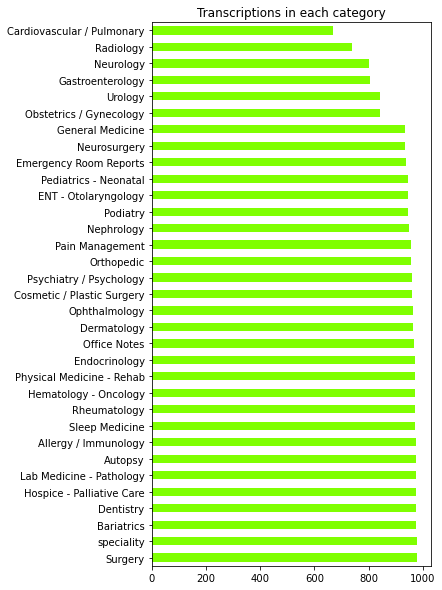

In [15]:
data1.specialty.value_counts().plot(color = 'chartreuse',kind='barh',figsize=(5, 10), title='Transcriptions in each category' )
plt.show()

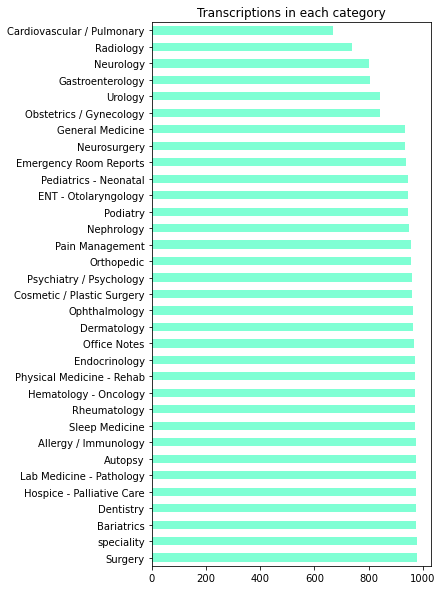

In [17]:
data2.specialty.value_counts().plot(color = 'aquamarine', kind='barh',figsize=(5, 10), title='Transcriptions in each category' )
plt.show()

Now the data is finally balanced! Now we can start training & testing.<br/>
I am only going to use the second dataset because it has brought better results in testing.

In [48]:
#We will split the data into features and specialties

X ,y = data2.iloc[:,0:21449], data2.iloc[:,21449:]

In each iteration we select the binary vector of each specialty as a label, <br/>
then we will train a random forest classifier which proves itself not bad in tabular data.<br/>
We will then immediately test it on the test data and check the accuracy.

In [56]:
models = {}

for specialty in tqdm(data1['specialty'].unique()):
    Y = y[specialty]
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)
    clf = RandomForestClassifier(max_depth=2, random_state=0).fit(X_train, y_train)
    print('{} accuracy: {}%'.format(specialty,accuracy_score(y_test, clf.predict(X_test))*100))
    models[specialty] =  clf

  3%|██▌                                                                                | 1/33 [00:08<04:16,  8.00s/it]

Allergy / Immunology accuracy: 96.46662317895195%


  6%|█████                                                                              | 2/33 [00:15<03:58,  7.71s/it]

Autopsy accuracy: 99.51076320939335%


  9%|███████▌                                                                           | 3/33 [00:22<03:48,  7.61s/it]

Bariatrics accuracy: 97.09719504240051%


 12%|██████████                                                                         | 4/33 [00:30<03:39,  7.59s/it]

Cardiovascular / Pulmonary accuracy: 97.92346162209175%


 15%|████████████▌                                                                      | 5/33 [00:38<03:33,  7.64s/it]

Cosmetic / Plastic Surgery accuracy: 96.81452489671668%


 18%|███████████████                                                                    | 6/33 [00:46<03:35,  7.98s/it]

Dentistry accuracy: 96.87975646879757%


 21%|█████████████████▌                                                                 | 7/33 [00:55<03:32,  8.16s/it]

Dermatology accuracy: 96.99934768427919%


 24%|████████████████████                                                               | 8/33 [01:04<03:30,  8.43s/it]

ENT - Otolaryngology accuracy: 96.85801261143727%


 27%|██████████████████████▋                                                            | 9/33 [01:13<03:24,  8.51s/it]

Emergency Room Reports accuracy: 96.67318982387475%


 30%|████████████████████████▊                                                         | 10/33 [01:21<03:16,  8.56s/it]

Endocrinology accuracy: 96.81452489671668%


 33%|███████████████████████████▎                                                      | 11/33 [01:30<03:05,  8.45s/it]

Gastroenterology accuracy: 97.64079147640791%


 36%|█████████████████████████████▊                                                    | 12/33 [01:38<02:56,  8.38s/it]

General Medicine accuracy: 96.9341161121983%


 39%|████████████████████████████████▎                                                 | 13/33 [01:46<02:46,  8.32s/it]

Hematology - Oncology accuracy: 96.86888454011742%


 42%|██████████████████████████████████▊                                               | 14/33 [01:54<02:37,  8.30s/it]

Hospice - Palliative Care accuracy: 97.3689932594042%


 45%|█████████████████████████████████████▎                                            | 15/33 [02:03<02:30,  8.36s/it]

Lab Medicine - Pathology accuracy: 96.85801261143727%


 48%|███████████████████████████████████████▊                                          | 16/33 [02:11<02:21,  8.32s/it]

Nephrology accuracy: 97.05370732767993%


 52%|██████████████████████████████████████████▏                                       | 17/33 [02:19<02:12,  8.25s/it]

Neurology accuracy: 97.48858447488584%


 55%|████████████████████████████████████████████▋                                     | 18/33 [02:27<02:04,  8.30s/it]

Neurosurgery accuracy: 96.71667753859535%


 58%|███████████████████████████████████████████████▏                                  | 19/33 [02:35<01:54,  8.21s/it]

Obstetrics / Gynecology accuracy: 97.1841704718417%


 61%|█████████████████████████████████████████████████▋                                | 20/33 [02:44<01:46,  8.22s/it]

Office Notes accuracy: 97.12981082844097%


 64%|████████████████████████████████████████████████████▏                             | 21/33 [02:52<01:38,  8.17s/it]

Ophthalmology accuracy: 96.86888454011742%


 67%|██████████████████████████████████████████████████████▋                           | 22/33 [03:00<01:28,  8.06s/it]

Orthopedic accuracy: 97.01021961295933%


 70%|█████████████████████████████████████████████████████████▏                        | 23/33 [03:08<01:21,  8.19s/it]

Pain Management accuracy: 96.99934768427919%


 73%|███████████████████████████████████████████████████████████▋                      | 24/33 [03:16<01:13,  8.21s/it]

Pediatrics - Neonatal accuracy: 96.92324418351815%


 76%|██████████████████████████████████████████████████████████████                    | 25/33 [03:25<01:05,  8.24s/it]

Physical Medicine - Rehab accuracy: 96.57534246575342%


 79%|████████████████████████████████████████████████████████████████▌                 | 26/33 [03:33<00:57,  8.21s/it]

Podiatry accuracy: 96.90150032615786%


 82%|███████████████████████████████████████████████████████████████████               | 27/33 [03:41<00:49,  8.22s/it]

Psychiatry / Psychology accuracy: 96.99934768427919%


 85%|█████████████████████████████████████████████████████████████████████▌            | 28/33 [03:50<00:42,  8.45s/it]

Radiology accuracy: 97.65166340508806%


 88%|████████████████████████████████████████████████████████████████████████          | 29/33 [03:58<00:33,  8.44s/it]

Rheumatology accuracy: 96.82539682539682%


 91%|██████████████████████████████████████████████████████████████████████████▌       | 30/33 [04:07<00:25,  8.37s/it]

Sleep Medicine accuracy: 96.64057403783431%


 94%|█████████████████████████████████████████████████████████████████████████████     | 31/33 [04:14<00:16,  8.20s/it]

Surgery accuracy: 96.7058056099152%


 97%|███████████████████████████████████████████████████████████████████████████████▌  | 32/33 [04:22<00:08,  8.03s/it]

Urology accuracy: 97.12981082844097%


100%|██████████████████████████████████████████████████████████████████████████████████| 33/33 [04:30<00:00,  8.20s/it]

speciality accuracy: 96.85801261143727%


Not bad results at all.<br/>
All that is left is to save the models for future uses.

In [57]:
models

{'Allergy / Immunology': RandomForestClassifier(max_depth=2, random_state=0),
 'Autopsy': RandomForestClassifier(max_depth=2, random_state=0),
 'Bariatrics': RandomForestClassifier(max_depth=2, random_state=0),
 'Cardiovascular / Pulmonary': RandomForestClassifier(max_depth=2, random_state=0),
 'Cosmetic / Plastic Surgery': RandomForestClassifier(max_depth=2, random_state=0),
 'Dentistry': RandomForestClassifier(max_depth=2, random_state=0),
 'Dermatology': RandomForestClassifier(max_depth=2, random_state=0),
 'ENT - Otolaryngology': RandomForestClassifier(max_depth=2, random_state=0),
 'Emergency Room Reports': RandomForestClassifier(max_depth=2, random_state=0),
 'Endocrinology': RandomForestClassifier(max_depth=2, random_state=0),
 'Gastroenterology': RandomForestClassifier(max_depth=2, random_state=0),
 'General Medicine': RandomForestClassifier(max_depth=2, random_state=0),
 'Hematology - Oncology': RandomForestClassifier(max_depth=2, random_state=0),
 'Hospice - Palliative Care':

In [58]:
for key, value in models.items():
    key = key.replace(" / ","_")
    key = key.replace(" - ","_")
    key = key.replace(" ","_")
    dump(value, 'models/' + key + '.joblib')